<a href="https://colab.research.google.com/github/PraneshC-143/Project/blob/main/Pranesh_mini_project_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/dataset1.csv')

In [ ]:
print(df.columns)

Index(['Rating', 'App', 'Category', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [ ]:
df.head(100)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.0,All of the parking lot - National Park applica...,AUTO_AND_VEHICLES,1754,14M,"500,000+",Free,0,Everyone,Auto & Vehicles,02-Jun-18,2.3.4,4.0 and up
96,4.4,Inquiry Fines and Debits of Vehicles,AUTO_AND_VEHICLES,2680,2.2M,"500,000+",Free,0,Everyone,Auto & Vehicles,20-Mar-18,1.03,4.0.3 and up
97,4.0,Gas Station,AUTO_AND_VEHICLES,1288,4.5M,"100,000+",Free,0,Everyone,Auto & Vehicles,21-Apr-18,2.17,4.0 and up
98,4.7,Hush - Beauty for Everyone,BEAUTY,18900,17M,"500,000+",Free,0,Everyone,Beauty,02-Aug-18,6.10.1,5.0 and up


In [ ]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)
df['Type'].fillna(method='ffill',inplace=True)
df['Current Ver'].fillna(method='ffill',inplace=True)
df['Android Ver'].fillna(method='ffill',inplace=True)

In [ ]:
df['size']=df['Size'].replace('Varies with device',np.nan)
df['size']=df['size'].str.replace('M','e6')
df['size']=df['size'].str.replace('k','e3')
df['size']=pd.to_numeric(df['size'],errors='coerce')

In [ ]:
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=pd.to_numeric(df['Installs'],errors='coerce')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          10840 non-null  float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
 13  size            9145 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 1.2+ MB
None


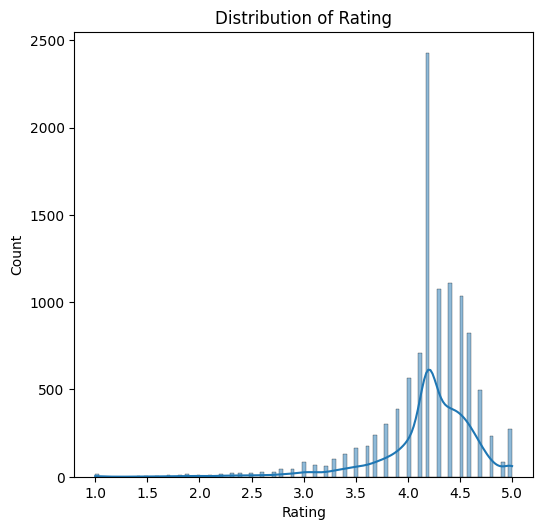

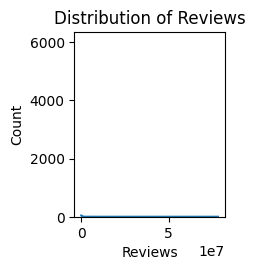

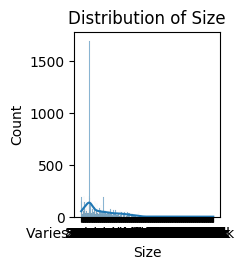

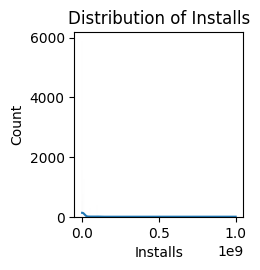

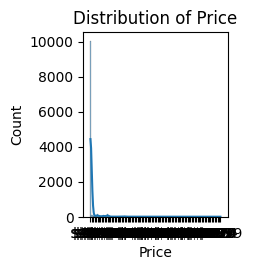

In [ ]:
numeric_cols=['Rating','Reviews','Size','Installs','Price']
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols,1):
  plt.subplot(2,3,i)
  sns.histplot(df[col].dropna(),kde=True)
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.show()

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show

ValueError: could not convert string to float: 'Photo Editor & Candy Camera & Grid & ScrapBook'

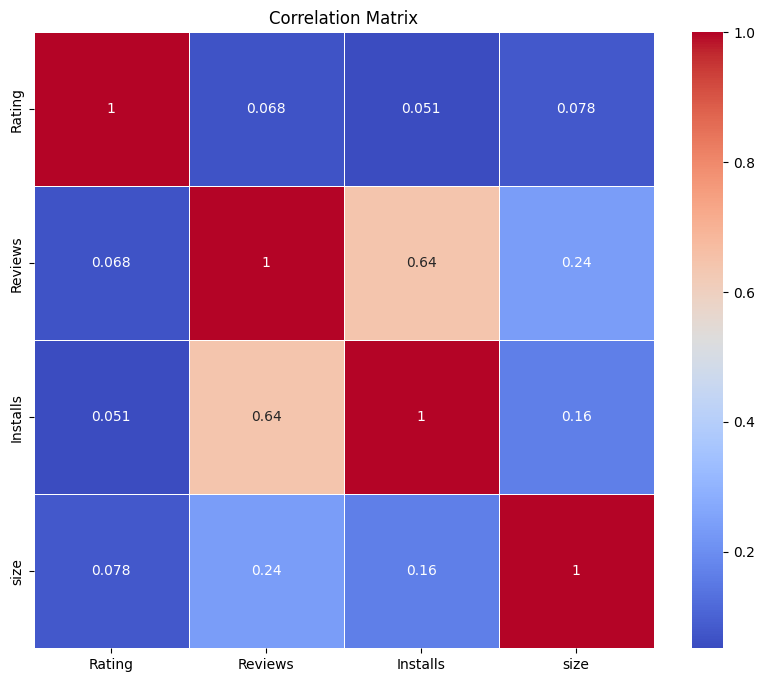

In [ ]:
# Convert 'Rating' column to numeric, handling errors
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Calculate correlation matrix only on numeric columns
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
summary_stats = df.describe()
print(summary_stats)

             Rating       Reviews      Installs          size
count  10840.000000  1.084000e+04  1.084000e+04  9.145000e+03
mean       4.191757  4.441529e+05  1.546434e+07  2.151653e+07
std        0.478907  2.927761e+06  8.502936e+07  2.258875e+07
min        1.000000  0.000000e+00  0.000000e+00  8.500000e+03
25%        4.100000  3.800000e+01  1.000000e+03  4.900000e+06
50%        4.200000  2.094000e+03  1.000000e+05  1.300000e+07
75%        4.500000  5.477550e+04  5.000000e+06  3.000000e+07
max        5.000000  7.815831e+07  1.000000e+09  1.000000e+08
